# Indepth Principal Component Analysis
**PCA is fundamentally an unsupervised dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction etc**

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


**Creating scatterplot of nearly linearly-distributed data**

In [25]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

(-2.775340502160928,
 2.6163437358689947,
 -0.9786874540516077,
 1.0504831267629149)

*In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows*

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [28]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


<IPython.core.display.Javascript object>


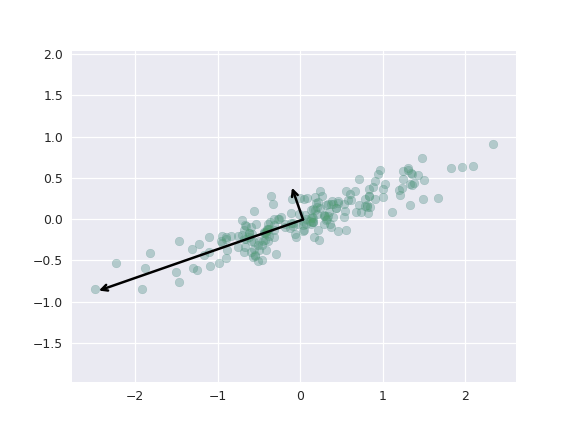

(-2.7705272920753137,
 2.6115305257833796,
 -0.9530125879457959,
 1.0248082606571038)

In [29]:
plt.figure()
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth = 2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    plt.scatter(X[:,0], X[:,1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

**<font color='red' >These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.</font>**

# PCA as dimentionality reuduction technique

In [30]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("tarnsformed shape: ", X_pca.shape)

original shape:  (200, 2)
tarnsformed shape:  (200, 1)


<IPython.core.display.Javascript object>


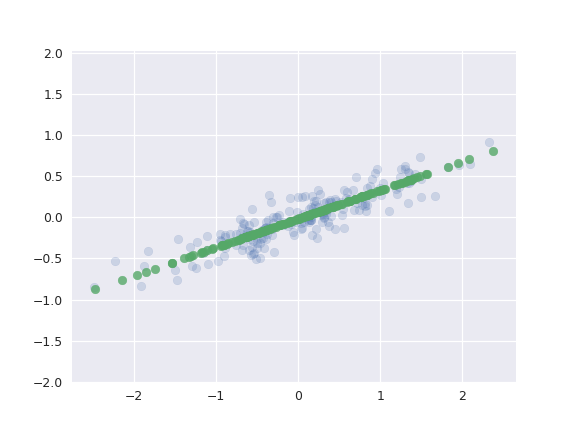

(-2.760354895836614, 2.650583711737073, -0.987217466350432, 1.0169344322370826)

In [32]:
plt.figure()
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha = 0.8)
plt.axis('equal')

*<font color = 'red'>The light points are the original data, while the dark points are the projected version. The is makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.</font> *

# PCA for visualisation of handwritten digits
**the digitas are in 8 x 8 pixel size i.e. 64 dimentions are there**

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [34]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


<IPython.core.display.Javascript object>


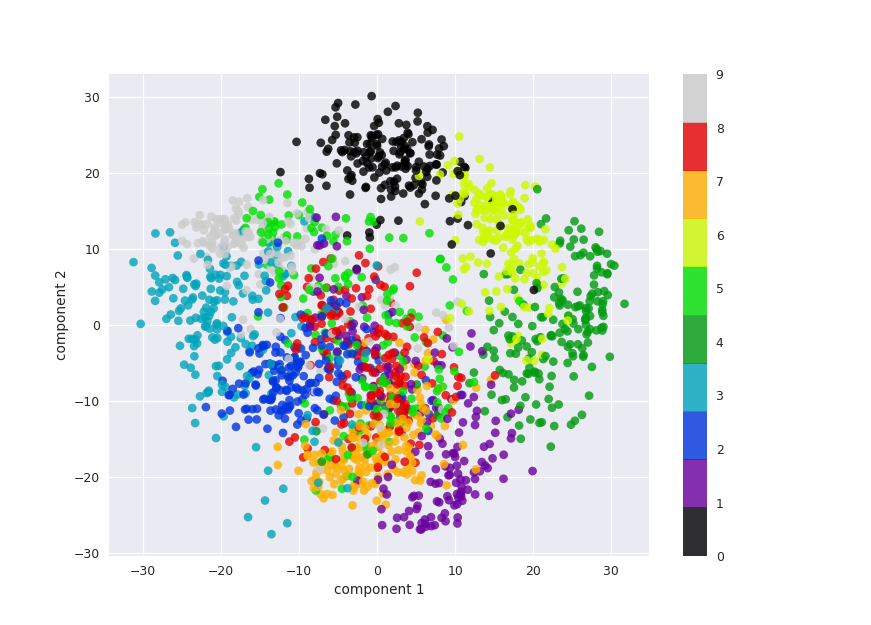

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [36]:
plt.figure()
plt.scatter(projected[:,0],projected[:,1], c=digits.target, edgecolors='none', alpha=0.8, 
            cmap=plt.cm.get_cmap('spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

**<font color='red'>Above scatterplot is 2 dimentional which is transformed from 64 dimentional dataset and the classification is completly unsupervised**

# Choosing number of principal components
**A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components **

<IPython.core.display.Javascript object>


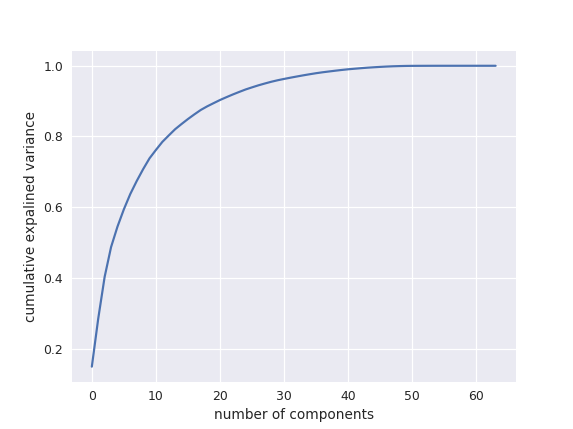

Text(0,0.5,'cumulative expalined variance')

In [38]:
plt.figure()
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative expalined variance')

*<font color='red'>Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.</font>*

# PCA as noise filtering
*PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.*

<IPython.core.display.Javascript object>


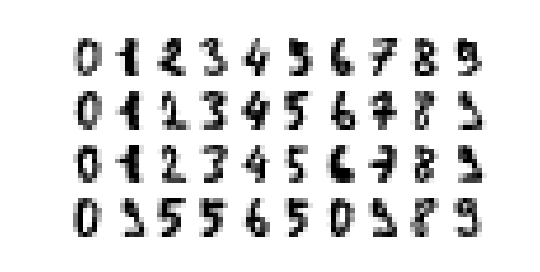

In [40]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4), subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap='binary', interpolation='nearest', clim=(0,16))
plot_digits(digits.data)

**<font color = 'red'>Let's add some noise in it</font>**

<IPython.core.display.Javascript object>


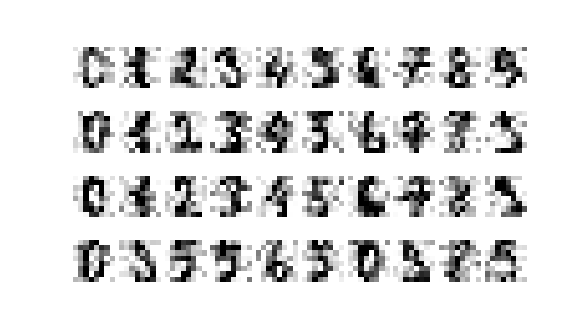

In [41]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

**Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance**

In [42]:
pca = PCA(0.50).fit(noisy) #preserve 50% of the variance
pca.n_components_

12

*50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:*

<IPython.core.display.Javascript object>


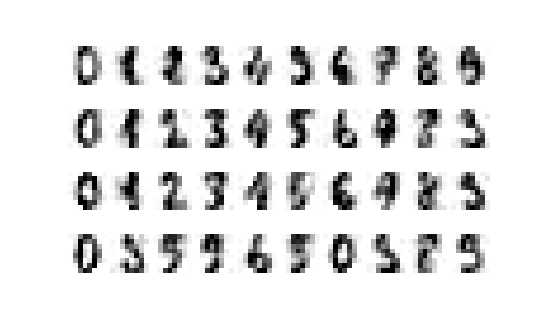

In [43]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

*This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs*

# Eigenfaces

In [44]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [45]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

RandomizedPCA(copy=True, iterated_power=2, n_components=150,
       random_state=None, whiten=False)

<IPython.core.display.Javascript object>


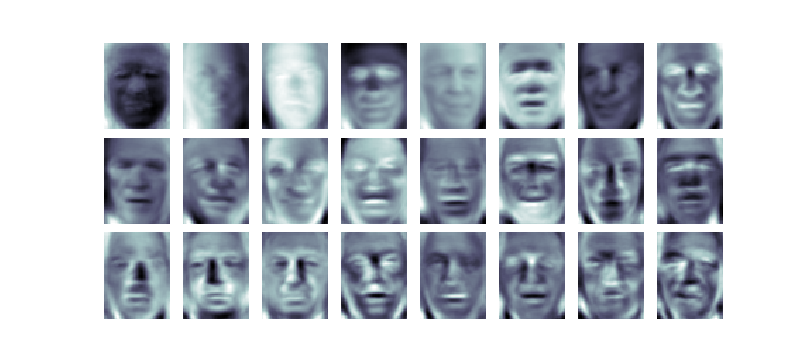

In [48]:
fig, axes = plt.subplots(3,8,figsize=(9,4), subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47), cmap='bone')

<IPython.core.display.Javascript object>


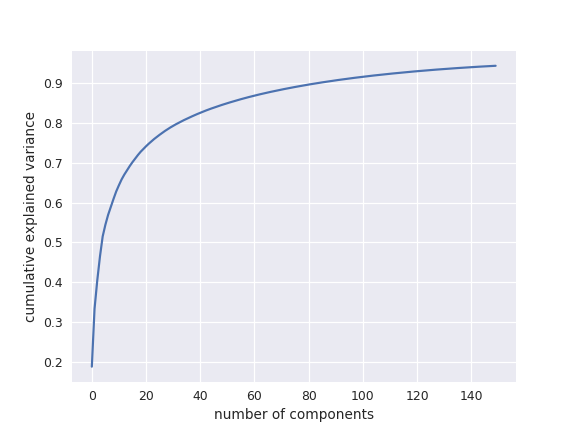

Text(0,0.5,'cumulative explained variance')

In [49]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [50]:
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

<IPython.core.display.Javascript object>


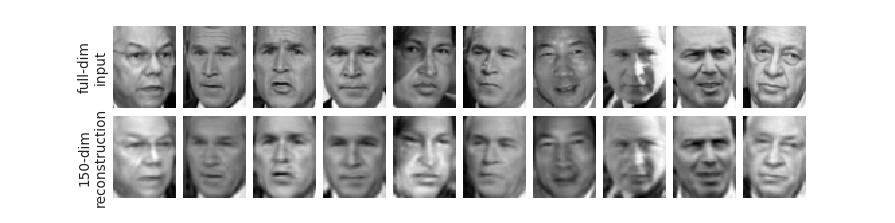

In [51]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

*<font color='red'>The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features</font>*

Refer: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html